# Oxygen Therapy - Causal Effect Estimation

We will use our validated causal effect estimation approach to estimate effects of interventions in our oxygen therapy project.

In [ ]:
# Load libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats as st

Mounted at /content/gdrive


In [ ]:
# Bootstrap approach to causal effect estimation
# reference: https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/

def estimationBootstrap(data, xColumns, xColumnsLabel, zColumns, yColumns, noIterations = 100, sampleProportion = 0.9, model = RandomForestClassifier(n_estimators=10), fileName = 'test', xLabel = 'Expectation', yLabel = 'Intervention'):
    # configure bootstrap
    iterations = noIterations

    # number of samples
    noSamples = int( sampleProportion * len(data))
    
    if noSamples > len(data):
        print('The sample size is greater than the length of the data being sampled')
    
    placebo_stats = list()
    treatment_stats = list()

    np.seterr('raise')
    for i in range(iterations):
        # Sample data for one bootstrap iteration
        sampledData = data.sample(noSamples, replace=True)
        sampledData.reset_index(drop=True, inplace=True)
        # data
        trainX = sampledData[xColumns]
        trainZ = sampledData[zColumns]
        trainY = sampledData[yColumns]

        trainXZ = pd.concat([trainX, trainZ], axis = 1)

        model.fit(trainXZ, trainY.values.ravel())

        testXZPlacebo = trainXZ.copy()
        testXZPlacebo[xColumns] = 0
        testXZTreatment = trainXZ.copy()
        testXZTreatment[xColumns] = 1

        placeboEstimate = np.mean(model.predict(testXZPlacebo))
        treatmentEstimate = np.mean(model.predict(testXZTreatment))
    
        placebo_stats.append(placeboEstimate)
        treatment_stats.append(treatmentEstimate)

        #causalEffect = treatmentEstimate - placeboEstimate   
        #print('Placebo estimate:' + str(placeboEstimate))
        #print('Treatment estimate:' + str(treatmentEstimate))
        #print('Causal effect:' + str(causalEffect))
    stats = pd.DataFrame(
        {'Liberal': placebo_stats,
         'Conservative': treatment_stats
        })
    #The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. 
    #The notebook style is the default, and was used in the plots above.
    # sns.color_palette("cubehelix")
    sns.set_context("paper")
    # sns.set(style="whitegrid")
    sns.set(style="ticks")
    ax = sns.violinplot(data=stats, palette=['r','g'])
    ax.set(xlabel = xLabel, ylabel = yLabel)
    if len(yColumns) == 1:
      if 'death' in str(yColumns) or 'mortality' in str(yColumns):
      #if 'death' in yColumns[0] or 'mortality' in yColumns[0]:
        ax.set(ylim=(0, 1.0))
    sns.despine()
    figure = ax.get_figure()    
    figure.savefig(fileName + ".png", dpi=600)
    #plt.show()
     # confidence intervals - placebo
    alpha = 0.95
    print('Liberal Oxygenation:')
    print('Mean: ' + str(np.mean(placebo_stats)) + ' and Std dev: ' + str(np.std(placebo_stats)))
    # ref: https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
    print("Confidence Interval:", st.t.interval(alpha, len(placebo_stats)-1, loc=np.mean(placebo_stats), scale=st.sem(placebo_stats)))
    # confidence intervals - treatment
    print('Conservative Oxygenation:')
    print('Mean: ' + str(np.mean(treatment_stats)) + ' and Std dev: ' + str(np.std(treatment_stats)))
    print("Confidence Interval:", st.t.interval(alpha, len(treatment_stats)-1, loc=np.mean(treatment_stats), scale=st.sem(treatment_stats)))

---
### Set both Oxygenation and SpO2 for *do* intervention
This is an experimental change to the estimation function where we set both oxygenation and SpO2 variables for Conservative and Liberal oxygenation strategies.


In [ ]:
# Bootstrap approach to causal effect estimation
# reference: https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/

def estimationBootstrapBothOxySpo2(data, xColumns, xColumnsLabel, zColumns, yColumns, noIterations = 100, sampleProportion = 0.9, model = RandomForestClassifier(n_estimators=10), fileName = 'test', xLabel = 'Expectation', yLabel = 'Intervention'):
    # configure bootstrap
    iterations = noIterations

    # number of samples
    noSamples = int( sampleProportion * len(data))
    
    if noSamples > len(data):
        print('The sample size is greater than the length of the data being sampled')
    
    placebo_stats = list()
    treatment_stats = list()

    np.seterr('raise')
    for i in range(iterations):
        # Sample data for one bootstrap iteration
        sampledData = data.sample(noSamples, replace=True)
        sampledData.reset_index(drop=True, inplace=True)
        # data
        trainX = sampledData[xColumns]
        trainZ = sampledData[zColumns]
        trainY = sampledData[yColumns]

        trainXZ = pd.concat([trainX, trainZ], axis = 1)

        model.fit(trainXZ, trainY.values.ravel())

        testXZPlacebo = trainXZ.copy()
        testXZPlacebo[xColumns] = 0
        testXZPlacebo['spo2'] = 97.884405 # mean Spo2 for control group
        testXZTreatment = trainXZ.copy()
        testXZTreatment[xColumns] = 1
        testXZTreatment['spo2'] = 94.229945 # mean Spo2 for treatment group

        placeboEstimate = np.mean(model.predict(testXZPlacebo))
        treatmentEstimate = np.mean(model.predict(testXZTreatment))
    
        placebo_stats.append(placeboEstimate)
        treatment_stats.append(treatmentEstimate)

        #causalEffect = treatmentEstimate - placeboEstimate   
        #print('Placebo estimate:' + str(placeboEstimate))
        #print('Treatment estimate:' + str(treatmentEstimate))
        #print('Causal effect:' + str(causalEffect))
    stats = pd.DataFrame(
        {'Liberal': placebo_stats,
         'Conservative': treatment_stats
        })
    #The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. 
    #The notebook style is the default, and was used in the plots above.
    # sns.color_palette("cubehelix")
    sns.set_context("paper")
    # sns.set(style="whitegrid")
    sns.set(style="ticks")
    ax = sns.violinplot(data=stats, palette=['r','g'])
    ax.set(xlabel = xLabel, ylabel = yLabel)
    if len(yColumns) == 1:
      if 'death' in str(yColumns) or 'mortality' in str(yColumns):
      #if 'death' in yColumns[0] or 'mortality' in yColumns[0]:
        ax.set(ylim=(0, 1.0))
    sns.despine()
    figure = ax.get_figure()    
    figure.savefig(fileName + ".png", dpi=600)
    #plt.show()
     # confidence intervals - placebo
    alpha = 0.95
    print('Liberal Oxygenation:')
    print('Mean: ' + str(np.mean(placebo_stats)) + ' and Std dev: ' + str(np.std(placebo_stats)))
    # ref: https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
    print("Confidence Interval:", st.t.interval(alpha, len(placebo_stats)-1, loc=np.mean(placebo_stats), scale=st.sem(placebo_stats)))
    # confidence intervals - treatment
    print('Conservative Oxygenation:')
    print('Mean: ' + str(np.mean(treatment_stats)) + ' and Std dev: ' + str(np.std(treatment_stats)))
    print("Confidence Interval:", st.t.interval(alpha, len(treatment_stats)-1, loc=np.mean(treatment_stats), scale=st.sem(treatment_stats)))

# Data

---
The "ot_data_preprocessed.csv" file contains the OT data that we extracted in Aug 2019. It has only one outcome 90-day mortality.

In [ ]:
dataOT_one_outcome = pd.read_csv("ot_data_preprocessed.csv")
dataOT_one_outcome.head()

,age,gender,bmi,surgery,trauma,medical,apsiii,sofa,smoker,copd,...,sao2,pao2,paco2,ph,lactate,hemoglobin,peep,vt,peakAirPressure,minVentVol
0,62,0,26.45,0,0,0,39,5,0,0,...,91.200000,84.259259,0.000000,7.337170,0.740,8.271429,9.894737,318.785714,35.352941,10.852000
1,52,0,36.86,0,0,0,77,9,0,0,...,94.000000,82.500000,0.000000,7.414286,1.725,7.400000,8.571429,460.153846,20.692308,11.484211
2,56,1,30.75,0,0,0,75,9,0,0,...,91.200000,89.263158,36.631579,7.433500,0.000,9.975000,10.785714,680.142857,25.500000,16.390000
3,51,1,0.00,0,0,0,44,4,1,0,...,98.000000,122.083333,56.727273,7.188333,1.400,10.200000,8.200000,585.514286,29.724138,18.450000
4,60,1,23.74,0,0,0,32,4,0,1,...,93.333333,67.250000,69.090909,7.335417,0.000,11.266666,6.250000,680.833333,29.281818,13.141667


Load the above data with IDs so that we can join it together with the new outcome data

In [ ]:
dataOT_one_outcome_with_ID = pd.read_csv("ot_data_with_IDs.csv")
dataOT_one_outcome_with_ID.head(10)

,subject_id,hadm_id,icustay_id,age,gender,weight,height,bmi,surgery,trauma,...,sao2,pao2,paco2,ph,lactate,hemoglobin,peep,vt,peakAirPressure,minVentVol
0,94414,170244,200143,62.0,F,59.4,1.50,26.45,0,0,...,91.200000,84.259259,NaN,7.337170,0.740000,8.271429,9.894737,318.785714,35.352941,10.852000
1,99836,101018,200347,52.0,F,80.0,1.47,36.86,0,0,...,94.000000,82.500000,NaN,7.414286,1.725000,7.400000,8.571429,460.153846,20.692308,11.484211
2,15312,125683,200391,56.0,M,100.0,1.80,30.75,0,0,...,91.200000,89.263158,36.631579,7.433500,NaN,9.975000,10.785714,680.142857,25.500000,16.390000
3,2343,124053,201414,51.0,M,64.0,NaN,NaN,0,0,...,98.000000,122.083333,56.727273,7.188333,1.400000,10.200000,8.200000,585.514286,29.724138,18.450000
4,2148,123870,201741,60.0,M,79.4,1.83,23.74,0,0,...,93.333333,67.250000,69.090909,7.335417,NaN,11.266666,6.250000,680.833333,29.281818,13.141667
5,11623,140615,203418,43.0,M,80.7,NaN,NaN,0,0,...,95.500000,88.000000,31.222222,7.351111,10.850000,9.071429,10.200000,521.250000,25.500000,19.300000
6,31300,136581,203503,83.0,F,65.0,1.63,24.60,0,0,...,75.666667,68.250000,35.363636,7.375833,1.300000,9.200000,7.461538,497.611111,24.263158,13.000000
7,31528,128863,203985,67.0,F,44.1,1.63,16.69,0,0,...,79.000000,97.833333,37.666667,7.393333,1.550000,8.700000,8.500000,377.000000,24.250000,10.851667
8,91558,119749,204020,57.0,F,64.9,1.68,23.09,0,0,...,93.714286,88.954545,NaN,7.379487,3.438889,8.745455,12.098592,511.130435,24.710145,9.647778
9,29588,187314,204047,78.0,M,75.0,1.70,25.90,0,0,...,95.500000,77.666667,48.666667,7.354000,1.566667,10.512500,5.000000,407.000000,29.500000,7.450000


---
We extracted data for multiple outcome for OT. It includes the following: ICU LOS, Hospital LOS, ICU Mortality, Hospital Mortality, 28-day Mortality, 90-day Mortality, 180-day Mortality

In [ ]:
dataOT_all_outcomes = pd.read_csv("ot_demographic_and_outcomes.csv")
dataOT_all_outcomes.head(10)

,subject_id,hadm_id,icustay_id,gender,age,weight,height,bmi,diagnosis,sofa,...,death30,death40,death50,death60,death70,death80,death90,death180,hospitalmortality,icumortality
0,56369,198650,200033,M,67.0,74.0,1.73,24.81,Sec mal neo brain/spine,1,...,1,1,1,1,1,1,1,1,1,1
1,8948,157243,200045,F,74.0,50.5,1.73,16.93,Nonrupt cerebral aneurym,5,...,0,0,0,0,0,0,0,1,0,0
2,28494,199133,200059,F,79.0,54.0,NaN,NaN,Hematoma complic proc,7,...,0,0,0,0,0,0,0,0,0,0
3,99052,129142,200063,M,37.0,131.8,1.70,45.51,Dsct of thoracic aorta,7,...,0,0,0,0,0,0,0,0,0,0
4,19891,112840,200065,F,45.0,120.0,1.75,39.07,Thrombot microangiopathy,15,...,0,0,0,0,0,0,0,0,0,0
5,2530,113580,200077,M,75.0,75.0,1.73,25.14,CHF NOS,4,...,0,0,0,0,0,0,0,0,0,0
6,11228,167826,200102,M,46.0,155.0,1.78,49.03,Septicemia NOS,15,...,1,1,1,1,1,1,1,1,1,1
7,9993,150740,200109,M,72.0,110.0,1.88,31.14,"Subendo infarct, initial",3,...,0,0,0,0,0,0,0,1,0,0
8,27874,193876,200140,M,68.0,80.0,1.78,25.31,Septicemia NOS,6,...,0,0,0,0,0,0,0,0,0,0
9,94414,170244,200143,F,62.0,59.4,1.50,26.45,Meth res pneu d/t Staph,5,...,1,1,1,1,1,1,1,1,1,1


let's separate data that are of importance in ot_all_outcomes. We are only interested in outcomes. All other data are available in the previous dataframe.

In [ ]:
dataOT_all_outcomes = dataOT_all_outcomes[['icustay_id', 'iculos',	'hospitallos',	'expire_flag', 'hospitalmortality',	'icumortality',	'death10',	'death20',	'death28',	'death30',	'death40',	'death50',	'death60',	'death70',	'death80',	'death90',	'death180']]
dataOT_all_outcomes.head()

,icustay_id,iculos,hospitallos,expire_flag,hospitalmortality,icumortality,death10,death20,death28,death30,death40,death50,death60,death70,death80,death90,death180
0,200033,13.0,13.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,200045,20.0,20.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,200059,13.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,200063,26.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,200065,13.0,54.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, let's merge new outcomes with the old data

In [ ]:
merged_ot_data = pd.merge(dataOT_one_outcome_with_ID, dataOT_all_outcomes, on = ['icustay_id'], how = 'inner')
merged_ot_data.head(10)

,subject_id,hadm_id,icustay_id,age,gender,weight,height,bmi,surgery,trauma,...,death20,death28,death30,death40,death50,death60,death70,death80,death90,death180
0,94414,170244,200143,62.0,F,59.4,1.50,26.45,0,0,...,0,1,1,1,1,1,1,1,1,1
1,99836,101018,200347,52.0,F,80.0,1.47,36.86,0,0,...,0,0,0,0,1,1,1,1,1,1
2,15312,125683,200391,56.0,M,100.0,1.80,30.75,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2343,124053,201414,51.0,M,64.0,NaN,NaN,0,0,...,1,1,1,1,1,1,1,1,1,1
4,2148,123870,201741,60.0,M,79.4,1.83,23.74,0,0,...,1,1,1,1,1,1,1,1,1,1
5,11623,140615,203418,43.0,M,80.7,NaN,NaN,0,0,...,1,1,1,1,1,1,1,1,1,1
6,31300,136581,203503,83.0,F,65.0,1.63,24.60,0,0,...,1,1,1,1,1,1,1,1,1,1
7,31528,128863,203985,67.0,F,44.1,1.63,16.69,0,0,...,0,0,0,0,0,0,0,0,0,0
8,91558,119749,204020,57.0,F,64.9,1.68,23.09,0,0,...,1,1,1,1,1,1,1,1,1,1
9,29588,187314,204047,78.0,M,75.0,1.70,25.90,0,0,...,1,1,1,1,1,1,1,1,1,1


Let's drop NaNs and convert gender 'M'/'F' to 1 and 0, respectively.

In [ ]:
merged_ot_data['gender'] = np.where(merged_ot_data['gender'] == 'M', 1, 0).astype(int)
merged_ot_data = merged_ot_data.fillna(0)
merged_ot_data.head(10)

,subject_id,hadm_id,icustay_id,age,gender,weight,height,bmi,surgery,trauma,...,death20,death28,death30,death40,death50,death60,death70,death80,death90,death180
0,94414,170244,200143,62.0,0,59.4,1.50,26.45,0,0,...,0,1,1,1,1,1,1,1,1,1
1,99836,101018,200347,52.0,0,80.0,1.47,36.86,0,0,...,0,0,0,0,1,1,1,1,1,1
2,15312,125683,200391,56.0,1,100.0,1.80,30.75,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2343,124053,201414,51.0,1,64.0,0.00,0.00,0,0,...,1,1,1,1,1,1,1,1,1,1
4,2148,123870,201741,60.0,1,79.4,1.83,23.74,0,0,...,1,1,1,1,1,1,1,1,1,1
5,11623,140615,203418,43.0,1,80.7,0.00,0.00,0,0,...,1,1,1,1,1,1,1,1,1,1
6,31300,136581,203503,83.0,0,65.0,1.63,24.60,0,0,...,1,1,1,1,1,1,1,1,1,1
7,31528,128863,203985,67.0,0,44.1,1.63,16.69,0,0,...,0,0,0,0,0,0,0,0,0,0
8,91558,119749,204020,57.0,0,64.9,1.68,23.09,0,0,...,1,1,1,1,1,1,1,1,1,1
9,29588,187314,204047,78.0,1,75.0,1.70,25.90,0,0,...,1,1,1,1,1,1,1,1,1,1


---
Now, let's finalize our dataframe with variables of interest.
We will get rid of IDs and other redundant variables.

In [ ]:
dataOT = merged_ot_data[['age',	'gender',	'weight',	'height',	'bmi', 'surgery',	'trauma',	'medical',	'apsiii',	'sofa',	'smoker',	'copd',	'ischemicHd',	'ards',	'oxygenation',	'spo2',	'fio2',	'sao2',	'pao2',	'paco2',	'ph',	'lactate',	'hemoglobin',	'peep',	'vt',	'peakAirPressure',	'minVentVol',	'iculos',	'hospitallos',	'expire_flag',	'hospitalmortality',	'icumortality',	'death10',	'death20',	'death28',	'death30',	'death40',	'death50',	'death60',	'death70',	'death80',	'death90',	'death180']]
# change the column 'expire_flag' to 'death' that represents whether a patient has died or not.
# previously it was 90-day mortality
dataOT = dataOT.rename({'expire_flag': 'death'}, axis=1)
dataOT.head(10)

,age,gender,weight,height,bmi,surgery,trauma,medical,apsiii,sofa,...,death20,death28,death30,death40,death50,death60,death70,death80,death90,death180
0,62.0,0,59.4,1.50,26.45,0,0,0,39,5,...,0,1,1,1,1,1,1,1,1,1
1,52.0,0,80.0,1.47,36.86,0,0,0,77,9,...,0,0,0,0,1,1,1,1,1,1
2,56.0,1,100.0,1.80,30.75,0,0,0,75,9,...,0,0,0,0,0,0,0,0,0,0
3,51.0,1,64.0,0.00,0.00,0,0,0,44,4,...,1,1,1,1,1,1,1,1,1,1
4,60.0,1,79.4,1.83,23.74,0,0,0,32,4,...,1,1,1,1,1,1,1,1,1,1
5,43.0,1,80.7,0.00,0.00,0,0,0,80,11,...,1,1,1,1,1,1,1,1,1,1
6,83.0,0,65.0,1.63,24.60,0,0,0,44,6,...,1,1,1,1,1,1,1,1,1,1
7,67.0,0,44.1,1.63,16.69,0,0,0,78,7,...,0,0,0,0,0,0,0,0,0,0
8,57.0,0,64.9,1.68,23.09,0,0,0,27,2,...,1,1,1,1,1,1,1,1,1,1
9,78.0,1,75.0,1.70,25.90,0,0,0,24,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
libData = dataOT.loc[dataOT['oxygenation'] == 0]
conData = dataOT.loc[dataOT['oxygenation'] == 1]
print(libData[["spo2"]].mean())
print(conData[["spo2"]].mean())

spo2    97.884405
dtype: float64
spo2    94.229945
dtype: float64


---
Now, let's write this to a csv file. This is the final data that we will use for all experiments.

In [ ]:
dataOT.to_csv('ot_data.csv', index = False)

---
# Observational distribution

In [ ]:
dataOT.groupby('oxygenation').death90.value_counts() # count

oxygenation  death90
0            0          2432
             1          1380
1            1           135
             0           115
Name: death90, dtype: int64

In [ ]:
p_death_oxygenation = dataOT.groupby('oxygenation').death90.apply(lambda g: g.value_counts()/len(g)) # probability
p_death_oxygenation

oxygenation   
0            0    0.637985
             1    0.362015
1            1    0.540000
             0    0.460000
Name: death90, dtype: float64

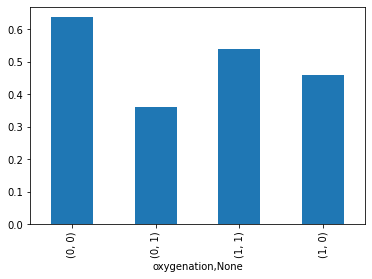

In [ ]:
p_death_oxygenation.plot(kind = 'bar')

# Interventions

- First query: $P_{Oxygenation}(death) = \sum \limits _{bmi,fio2,hemoglobin,minVentVol,peakAirPressure,peep,ph,sofa,spo2} P(death ∣ oxygenation,bmi,fio2,hemoglobin,minVentVol,peakAirPressure,peep,ph,sofa,spo2) P(bmi,fio2,hemoglobin,minVentVol,peakAirPressure,peep,ph,sofa,spo2)$

Liberal Oxygenation:
Mean: 0.3629712722298221 and Std dev: 0.008469363319317027
Confidence Interval: (0.361282300727273, 0.3646602437323712)
Conservative Oxygenation:
Mean: 0.3573679890560875 and Std dev: 0.013637273151179808
Confidence Interval: (0.3546484262204388, 0.36008755189173625)


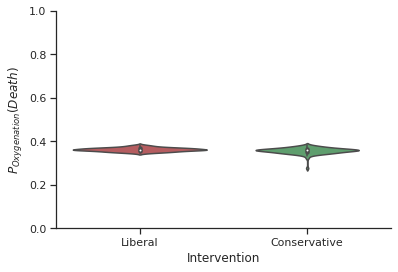

In [ ]:
# Change ML model to RF
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['bmi', 'fio2', 'hemoglobin', 'minVentVol', 'peakAirPressure', 'peep', 'ph', 'sofa', 'spo2']
yColumns = ['death90']
estimationBootstrap(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_nonSpO2_RF', 'Intervention', '$P_{Oxygenation}(Death)$')

Liberal Oxygenation:
Mean: 0.3090095759233926 and Std dev: 0.014697385895370533
Confidence Interval: (0.30607860401873593, 0.3119405478280493)
Conservative Oxygenation:
Mean: 0.4633953488372093 and Std dev: 0.11463872547802031
Confidence Interval: (0.4405339443702036, 0.486256753304215)


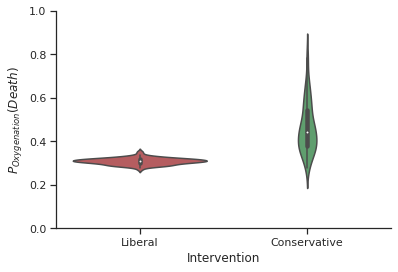

In [ ]:
# Set both oxygenation and SpO2 in do intervention
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['bmi', 'fio2', 'hemoglobin', 'minVentVol', 'peakAirPressure', 'peep', 'ph', 'sofa', 'spo2']
yColumns = ['death90']
estimationBootstrapBothOxySpo2(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_RF', 'Intervention', '$P_{Oxygenation}(Death)$')

Liberal Oxygenation:
Mean: 0.36203222798778867 and Std dev: 0.008252734155899572
Confidence Interval: (0.36038645695614135, 0.363677999019436)
Conservative Oxygenation:
Mean: 0.5611029494734586 and Std dev: 0.03586975010112756
Confidence Interval: (0.5539497570267272, 0.56825614192019)


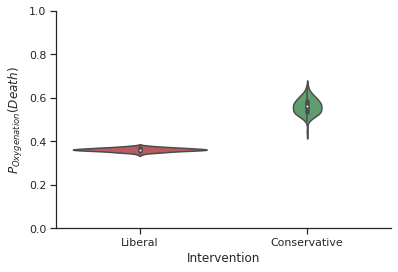

In [ ]:
# Set both oxygenation and SpO2 in do intervention
noIterations = 100
sampleProportion = 0.9
mlModel = LinearRegression()
#mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['bmi', 'fio2', 'hemoglobin', 'minVentVol', 'peakAirPressure', 'peep', 'ph', 'sofa', 'spo2']
yColumns = ['death90']
estimationBootstrapBothOxySpo2(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_LR', 'Intervention', '$P_{Oxygenation}(Death)$')

Liberal Oxygenation:
Mean: 0.3860574555403557 and Std dev: 0.014252839996600512
Confidence Interval: (0.38321513555985076, 0.38889977552086064)
Conservative Oxygenation:
Mean: 0.4808125854993161 and Std dev: 0.08543714208893363
Confidence Interval: (0.4637745989580697, 0.4978505720405625)


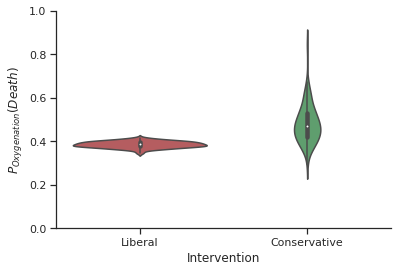

In [ ]:
# Change ML model to RF
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['bmi', 'fio2', 'hemoglobin', 'minVentVol', 'peakAirPressure', 'peep', 'ph', 'sofa', 'spo2']
yColumns = ['death180']
estimationBootstrapBothOxySpo2(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death180_do_oxygenation_LR', 'Intervention', '$P_{Oxygenation}(Death)$')

Liberal Oxygenation:
Mean: 0.17584404924760602 and Std dev: 0.014376324234061393
Confidence Interval: (0.1729771038790734, 0.17871099461613865)
Conservative Oxygenation:
Mean: 0.4010670314637484 and Std dev: 0.10801605204118371
Confidence Interval: (0.37952632918931417, 0.4226077337381826)


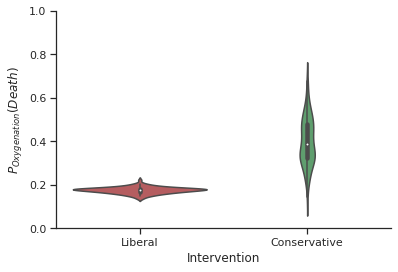

In [ ]:
# Change ML model to RF
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['bmi', 'fio2', 'hemoglobin', 'minVentVol', 'peakAirPressure', 'peep', 'ph', 'sofa', 'spo2']
yColumns = ['death28']
estimationBootstrapBothOxySpo2(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death28_do_oxygenation_LR', 'Intervention', '$P_{Oxygenation}(Death)$')

Liberal Oxygenation:
Mean: 0.19749110807113546 and Std dev: 0.016037082444970544
Confidence Interval: (0.19429297212958155, 0.20068924401268937)
Conservative Oxygenation:
Mean: 0.35780027359781114 and Std dev: 0.115614025563612
Confidence Interval: (0.33474437351302494, 0.38085617368259733)


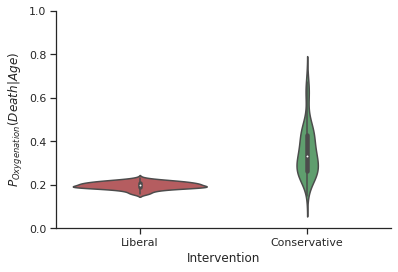

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['bmi', 'fio2', 'hemoglobin', 'minVentVol', 'peakAirPressure', 'peep', 'ph', 'sofa', 'spo2']
yColumns = ['hospitalmortality']
estimationBootstrapBothOxySpo2(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_deathHospital_do_oxygenation_LR', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

Liberal Oxygenation:
Mean: 0.2243693570451436 and Std dev: 0.00786537843730925
Confidence Interval: (0.22280083299716935, 0.22593788109311785)
Conservative Oxygenation:
Mean: 0.21775376196990423 and Std dev: 0.011355521831308077
Confidence Interval: (0.21548922896470069, 0.22001829497510778)


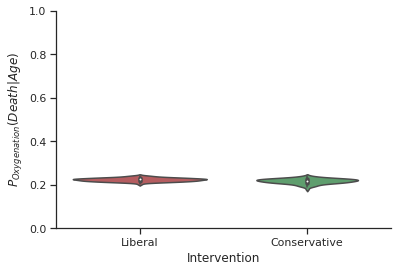

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['bmi', 'fio2', 'hemoglobin', 'minVentVol', 'peakAirPressure', 'peep', 'ph', 'sofa', 'spo2']
yColumns = ['icumortality']
estimationBootstrap(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_deathICU_do_oxygenation_nonSpO2_LR', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

Liberal Oxygenation:
Mean: 0.1561887824897401 and Std dev: 0.013772363512124172
Confidence Interval: (0.15344227975774952, 0.1589352852217307)
Conservative Oxygenation:
Mean: 0.30421067031463744 and Std dev: 0.09353522824850156
Confidence Interval: (0.2855577528472963, 0.3228635877819786)


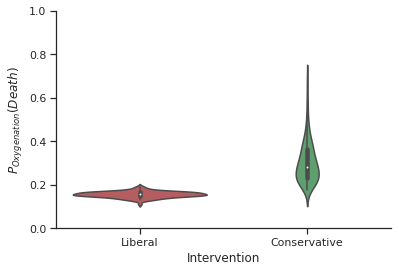

In [ ]:
# Set both oxygenation and SpO2 in do intervention
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['bmi', 'fio2', 'hemoglobin', 'minVentVol', 'peakAirPressure', 'peep', 'ph', 'sofa', 'spo2']
yColumns = ['icumortality']
estimationBootstrapBothOxySpo2(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_deathICU_do_oxygenation_LR', 'Intervention', '$P_{Oxygenation}(Death)$')

# Age-specific and SOFA-specific Analyses

- Second query: $P_{Oxygenation}(death | age) = \sum \limits _{apsiii,spo2,hemoglobin,lactate} P(death ∣ oxygenation,age,apsiii,spo2,hemoglobin,lactate)P(apsiii,spo2,hemoglobin,lactate)$

Liberal Oxygenation:
Mean: 0.2636196990424077 and Std dev: 0.01878389772964951
Confidence Interval: (0.25987378960671076, 0.2673656084781046)
Conservative Oxygenation:
Mean: 0.6757756497948018 and Std dev: 0.09950562385746199
Confidence Interval: (0.6559321082318478, 0.6956191913577557)


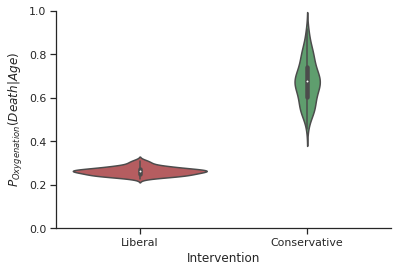

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['age', 'apsiii' , 'spo2' , 'hemoglobin' , 'lactate']
yColumns = ['death90']
estimationBootstrapBothOxySpo2(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_given_age_RF', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

In [ ]:
yColumns[0]

'death90'

---
$P_{Oxygenation}(death | age <= 60)$

Liberal Oxygenation:
Mean: 0.1170472972972973 and Std dev: 0.02559033737675698
Confidence Interval: (0.1119440387711953, 0.12215055582339931)
Conservative Oxygenation:
Mean: 0.6475540540540541 and Std dev: 0.13895301992328143
Confidence Interval: (0.6198438612101264, 0.6752642468979818)


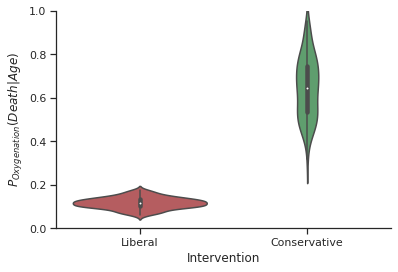

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['apsiii' , 'spo2' , 'hemoglobin' , 'lactate']
yColumns = ['death90']
dataOT_LE_60 = dataOT[dataOT['age'] <= 60]
estimationBootstrapBothOxySpo2(dataOT_LE_60, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'test', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

Liberal Oxygenation:
Mean: 0.13622297297297298 and Std dev: 0.020875621920725226
Confidence Interval: (0.1320599291652198, 0.14038601678072615)
Conservative Oxygenation:
Mean: 0.6448310810810811 and Std dev: 0.12584264464297373
Confidence Interval: (0.6197353764107402, 0.6699267857514221)


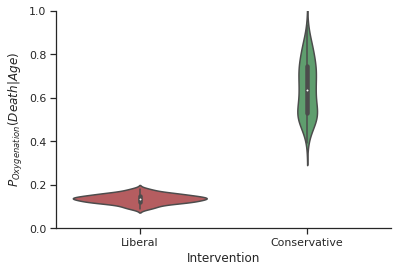

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['age', 'apsiii' , 'spo2' , 'hemoglobin' , 'lactate']
yColumns = ['death90']
dataOT_LE_60 = dataOT[dataOT['age'] <= 60]
estimationBootstrapBothOxySpo2(dataOT_LE_60, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_given_age_le_60_RF', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

Liberal Oxygenation:
Mean: 0.06839189189189189 and Std dev: 0.01837951606176612
Confidence Interval: (0.06472662477692885, 0.07205715900685493)
Conservative Oxygenation:
Mean: 0.5356351351351352 and Std dev: 0.1502611137352229
Confidence Interval: (0.5056698674436141, 0.5656004028266562)


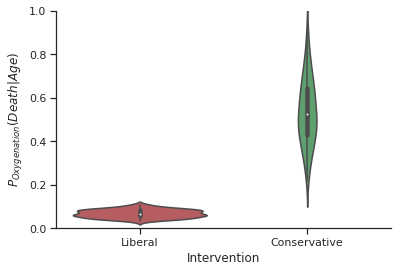

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['age', 'apsiii' , 'spo2' , 'hemoglobin' , 'lactate']
yColumns = ['death28']
dataOT_LE_60 = dataOT[dataOT['age'] <= 60]
estimationBootstrapBothOxySpo2(dataOT_LE_60, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death28_do_oxygenation_given_age_le_60_RF', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

Liberal Oxygenation:
Mean: 0.36299310344827573 and Std dev: 0.02763348400942489
Confidence Interval: (0.3574823979503058, 0.3685038089462457)
Conservative Oxygenation:
Mean: 0.7007816091954022 and Std dev: 0.11560123897534902
Confidence Interval: (0.6777282590287594, 0.723834959362045)


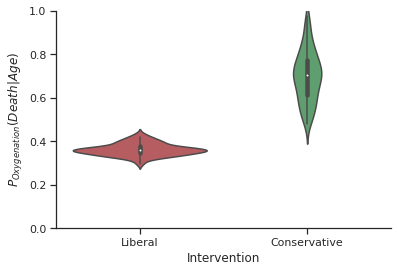

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['age', 'apsiii' , 'spo2' , 'hemoglobin' , 'lactate']
yColumns = ['death90']
dataOT_GT_60 = dataOT[dataOT['age'] > 60]
estimationBootstrapBothOxySpo2(dataOT_GT_60, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_given_age_gt_60_RF', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

Liberal Oxygenation:
Mean: 0.1651954022988506 and Std dev: 0.020452019712449036
Confidence Interval: (0.1611168337971176, 0.1692739708005836)
Conservative Oxygenation:
Mean: 0.685944827586207 and Std dev: 0.10798809415543713
Confidence Interval: (0.6644097007098891, 0.7074799544625249)


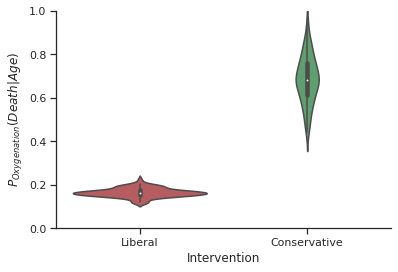

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['age', 'apsiii' , 'spo2' , 'hemoglobin' , 'lactate']
yColumns = ['death28']
dataOT_GT_60 = dataOT[dataOT['age'] > 60]
estimationBootstrapBothOxySpo2(dataOT_GT_60, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death28_do_oxygenation_given_age_gt_60_RF', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

Liberal Oxygenation:
Mean: 0.43477590007347544 and Std dev: 0.033713250985166164
Confidence Interval: (0.4280527594989814, 0.44149904064796947)
Conservative Oxygenation:
Mean: 0.7340778839088904 and Std dev: 0.11698867485393546
Confidence Interval: (0.7107478494659689, 0.7574079183518119)


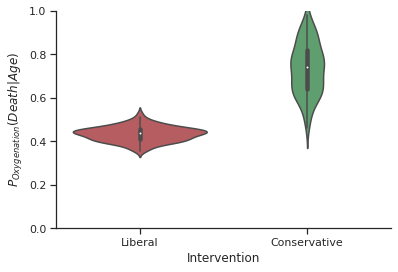

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['age', 'apsiii' , 'spo2' , 'hemoglobin' , 'lactate']
yColumns = ['death90']
dataOT_GT_70 = dataOT[dataOT['age'] > 70]
estimationBootstrapBothOxySpo2(dataOT_GT_70, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_given_age_gt_70_RF', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

Liberal Oxygenation:
Mean: 0.20204996326230712 and Std dev: 0.026659416555083033
Confidence Interval: (0.19673350756918276, 0.20736641895543148)
Conservative Oxygenation:
Mean: 0.7565172667156501 and Std dev: 0.11964684437472968
Confidence Interval: (0.732657136632679, 0.7803773967986213)


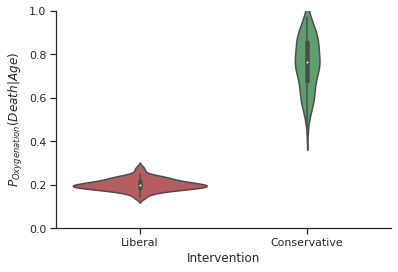

In [ ]:
# RF model
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
zColumns = ['age', 'apsiii' , 'spo2' , 'hemoglobin' , 'lactate']
yColumns = ['death28']
dataOT_GT_70 = dataOT[dataOT['age'] > 70]
estimationBootstrapBothOxySpo2(dataOT_GT_70, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death28_do_oxygenation_given_age_gt_70_RF', 'Intervention', '$P_{Oxygenation}(Death | Age)$')

- Third query: $P_{Oxygenation}(death | apsiii, sofa) = \sum \limits _{smoker,copd,spo2,fio2,hemoglobin,peep,peakAirPressure} P(death∣oxygenation,apsiii,sofa,smoker,copd,spo2,fio2,hemoglobin,peep,peakAirPressure)P(smoker,copd,spo2,fio2,hemoglobin,peep,peakAirPressure)$

​	 

Liberal Oxygenation:
Mean: 0.24914911080711355 and Std dev: 0.02017970804481704
Confidence Interval: (0.24512484705404955, 0.2531733745601775)
Conservative Oxygenation:
Mean: 0.5321121751025992 and Std dev: 0.14627553124753617
Confidence Interval: (0.5029417174799069, 0.5612826327252916)


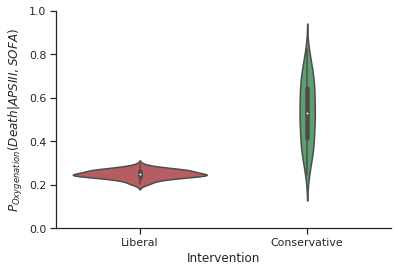

In [ ]:
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
#zColumns = ['apsiii', 'sofa', 'fio2', 'lactate']
zColumns = ['smoker', 'copd', 'spo2', 'fio2', 'hemoglobin', 'peep', 'peakAirPressure']
yColumns = ['death90']
estimationBootstrapBothOxySpo2(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_given_apsiii_sofa_RF', 'Intervention', '$P_{Oxygenation}(Death | APSIII, SOFA)$')

Liberal Oxygenation:
Mean: 0.1126812585499316 and Std dev: 0.016843823210701207
Confidence Interval: (0.10932224131046998, 0.11604027578939323)
Conservative Oxygenation:
Mean: 0.4414199726402188 and Std dev: 0.15125140741749787
Confidence Interval: (0.41125721928827014, 0.4715827259921675)


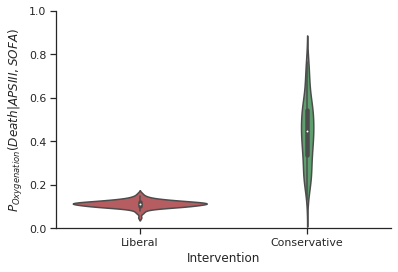

In [ ]:
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
#zColumns = ['apsiii', 'sofa', 'fio2', 'lactate']
zColumns = ['smoker', 'copd', 'spo2', 'fio2', 'hemoglobin', 'peep', 'peakAirPressure']
yColumns = ['death28']
estimationBootstrapBothOxySpo2(dataOT, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death28_do_oxygenation_given_apsiii_sofa_RF', 'Intervention', '$P_{Oxygenation}(Death | APSIII, SOFA)$')

Liberal Oxygenation:
Mean: 0.21287312240332376 and Std dev: 0.02398153220340895
Confidence Interval: (0.20809069390759027, 0.21765555089905725)
Conservative Oxygenation:
Mean: 0.5020006391818472 and Std dev: 0.15299092985526808
Confidence Interval: (0.4714909879918122, 0.5325102903718822)


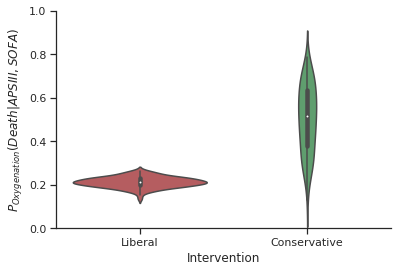

In [ ]:
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
#zColumns = ['apsiii', 'sofa', 'fio2', 'lactate']
zColumns = ['smoker', 'copd', 'spo2', 'fio2', 'hemoglobin', 'peep', 'peakAirPressure']
yColumns = ['death90']
dataOT_SOFA_LE_10 = dataOT[dataOT['sofa'] <= 10]
estimationBootstrapBothOxySpo2(dataOT_SOFA_LE_10, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_given_apsiii_sofa_le_10_RF', 'Intervention', '$P_{Oxygenation}(Death | APSIII, SOFA)$')

Liberal Oxygenation:
Mean: 0.4957794676806083 and Std dev: 0.044810156139539016
Confidence Interval: (0.4868433677766357, 0.5047155675845809)
Conservative Oxygenation:
Mean: 0.6792395437262359 and Std dev: 0.1701942679846587
Confidence Interval: (0.6452991803617701, 0.7131799070907016)


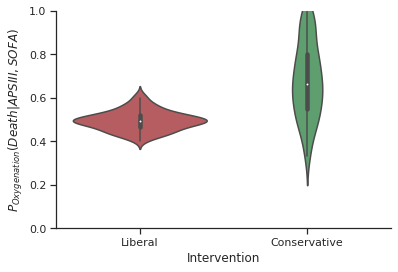

In [ ]:
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
#zColumns = ['apsiii', 'sofa', 'fio2', 'lactate']
zColumns = ['smoker', 'copd', 'spo2', 'fio2', 'hemoglobin', 'peep', 'peakAirPressure']
yColumns = ['death90']
dataOT_SOFA_GT_10 = dataOT[dataOT['sofa'] > 10]
estimationBootstrapBothOxySpo2(dataOT_SOFA_GT_10, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death90_do_oxygenation_given_apsiii_sofa_gt_10_RF', 'Intervention', '$P_{Oxygenation}(Death | APSIII, SOFA)$')

Liberal Oxygenation:
Mean: 0.09677213167146054 and Std dev: 0.016223576099213502
Confidence Interval: (0.09353680492163133, 0.10000745842128975)
Conservative Oxygenation:
Mean: 0.39655800575263667 and Std dev: 0.1569886183462689
Confidence Interval: (0.36525113029876954, 0.4278648812065038)


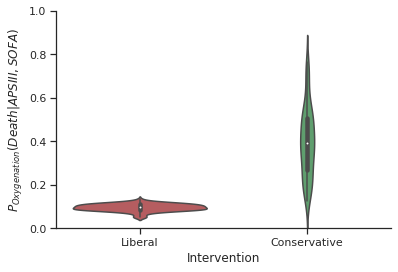

In [ ]:
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
#zColumns = ['apsiii', 'sofa', 'fio2', 'lactate']
zColumns = ['smoker', 'copd', 'spo2', 'fio2', 'hemoglobin', 'peep', 'peakAirPressure']
yColumns = ['death28']
dataOT_SOFA_LE_10 = dataOT[dataOT['sofa'] <= 10]
estimationBootstrapBothOxySpo2(dataOT_SOFA_LE_10, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death28_do_oxygenation_given_apsiii_sofa_le_10_RF', 'Intervention', '$P_{Oxygenation}(Death | APSIII, SOFA)$')

Liberal Oxygenation:
Mean: 0.3018821292775666 and Std dev: 0.033899310925720974
Confidence Interval: (0.2951218843865478, 0.30864237416858537)
Conservative Oxygenation:
Mean: 0.7263307984790877 and Std dev: 0.17672928030537227
Confidence Interval: (0.6910872144164004, 0.7615743825417749)


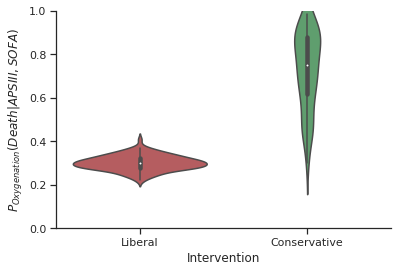

In [ ]:
noIterations = 100
sampleProportion = 0.9
#mlModel = LinearRegression()
mlModel = RandomForestClassifier(10)
xColumns = ['oxygenation']
#zColumns = ['apsiii', 'sofa', 'fio2', 'lactate']
zColumns = ['smoker', 'copd', 'spo2', 'fio2', 'hemoglobin', 'peep', 'peakAirPressure']
yColumns = ['death28']
dataOT_SOFA_GT_10 = dataOT[dataOT['sofa'] > 10]
estimationBootstrapBothOxySpo2(dataOT_SOFA_GT_10, xColumns, 'oxygenation', zColumns, yColumns, noIterations, sampleProportion, mlModel,
                    'p_death28_do_oxygenation_given_apsiii_sofa_gt_10_RF', 'Intervention', '$P_{Oxygenation}(Death | APSIII, SOFA)$')